常見機器學習演算法 <br/>
https://buzzorange.com/techorange/2019/08/13/machine-learning-algorithm-collection/ <br/>
https://bigdatafinance.tw/index.php/tech/564-2018-03-28-09-55-07 <br/>

In [1]:
from sklearn.model_selection import GridSearchCV,learning_curve, validation_curve
import time
import datetime
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

In [2]:
def print_best_score(gsearch,param_test):
     # 输出best score
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")
    # 输出最佳的分类器到底使用了怎样的参数
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

def plot_learning_curve(train_sizes, train_scores, test_scores, title, xlabel, ylabel, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    print(test_mean)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel, ylabel, alpha=0.1):
    #param_range = [x[1] for x in param_range] 
    #sort_idx = np.argsort(param_range)
    #param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)#[sort_idx]
    train_std = np.std(train_scores, axis=1)#[sort_idx]
    test_mean = np.mean(test_scores, axis=1)#[sort_idx]
    test_std = np.std(test_scores, axis=1)#[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.show()

In [3]:
import os
import MySQLdb
import pandas as pd
import numpy as np
import traceback
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import shutil
from LogClass import LogObj
from ConnMySQLDB import MySQLDB
from Voice_Dectection_Utils import VoiceDetectionUtils

# init
logFile = LogObj('.','logFile')
mySQLDB = MySQLDB(logFile)
utils = VoiceDetectionUtils(logFile)

In [4]:
#"select * from t_device40 where rec_datetime >= '2019-07-19 20:39:00' and rec_datetime <= '2019-07-19 20:56:00';"
ErrSQL = [
      "select * from t_device41 where rec_datetime >= '2019-07-20 16:31:30' and rec_datetime <= '2019-07-20 16:49:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 11:28:30' and rec_datetime <= '2019-07-21 11:40:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:14:00' and rec_datetime <= '2019-07-22 22:23:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 15:19:00' and rec_datetime <= '2019-07-23 15:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 16:23:00' and rec_datetime <= '2019-07-23 17:02:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-23 20:38:30' and rec_datetime <= '2019-07-22 20:42:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 22:49:00' and rec_datetime <= '2019-07-23 23:03:30';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 03:14:30' and rec_datetime <= '2019-07-24 03:22:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:36:00' and rec_datetime <= '2019-07-24 04:38:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 06:39:00' and rec_datetime <= '2019-07-24 06:43:00';"
      #,"select * from t_device41 where rec_datetime >= '2019-07-24 16:37:00' and rec_datetime <= '2019-07-24 17:15:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-25 14:43:30' and rec_datetime <= '2019-07-25 14:48:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 16:56:30' and rec_datetime <= '2019-07-26 17:17:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 11:50:30' and rec_datetime <= '2019-07-27 12:19:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:07:30' and rec_datetime <= '2019-07-28 16:25:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-05 16:29:30' and rec_datetime <= '2019-08-05 16:34:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:28:30' and rec_datetime <= '2019-08-07 21:33:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 22:06:30' and rec_datetime <= '2019-08-07 22:16:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-09 02:26:00' and rec_datetime <= '2019-08-09 02:33:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:05:30' and rec_datetime <= '2019-08-14 06:26:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-14 06:38:30' and rec_datetime <= '2019-08-14 06:46:30';"];

#抓取資料
OutputErrRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)


SQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 21:02:30' and rec_datetime <= '2019-07-19 21:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:18:30' and rec_datetime <= '2019-07-19 22:32:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-19 22:53:00' and rec_datetime <= '2019-07-19 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-21 12:00:00' and rec_datetime <= '2019-07-21 12:09:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-22 22:35:30' and rec_datetime <= '2019-07-22 22:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-23 17:13:00' and rec_datetime <= '2019-07-23 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 03:26:30' and rec_datetime <= '2019-07-24 03:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 04:43:00' and rec_datetime <= '2019-07-24 05:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 17:29:30' and rec_datetime <= '2019-07-24 18:05:00';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-24 18:12:00' and rec_datetime <= '2019-07-24 18:28:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-26 17:36:30' and rec_datetime <= '2019-07-26 18:29:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-27 13:07:00' and rec_datetime <= '2019-07-27 13:20:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-28 16:43:00' and rec_datetime <= '2019-07-28 17:59:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-07-31 11:21:00' and rec_datetime <= '2019-07-31 12:02:30';"
      ,"select * from t_device41 where rec_datetime >= '2019-08-07 21:42:00' and rec_datetime <= '2019-08-07 21:59:30';"];

#抓取正常資料
OutputNormalRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',SQL)


In [5]:
changedSQL = ["select * from t_device40 where rec_datetime >= '2019-09-17 17:02:30' and rec_datetime <= '2019-09-17 17:59:30';",
             "select * from t_device40 where rec_datetime >= '2019-09-20 11:02:30' and rec_datetime <= '2019-09-20 12:00:30';"];

#抓取正常資料
changedOutputNormalRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',changedSQL)

In [6]:
changedErrSQL = ["select * from t_device40 where rec_datetime >= '2019-09-29 15:13:00' and rec_datetime <= '2019-09-29 15:16:05';"
                 ,"select * from t_device40 where rec_datetime >= '2019-09-24 07:34:00' and rec_datetime <= '2019-09-24 07:38:00';"
                 , "select * from t_device40 where rec_datetime >= '2019-09-23 21:59:00' and rec_datetime <= '2019-09-23 22:00:30';"
                 , "select * from t_device40 where rec_datetime >= '2019-09-23 14:54:00' and rec_datetime <= '2019-09-23 14:59:00';" #小沖
                 , "select * from t_device40 where rec_datetime >= '2019-09-20 12:51:00' and rec_datetime <= '2019-09-20 12:54:00';" #沒沖水
                ];

#抓取異常資料
changedOutputErrRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',changedErrSQL)

In [9]:
#changedOutputErrRaw =changedOutputErrRaw.drop(index=changedOutputErrRaw[changedOutputErrRaw["label"]>0].index)

In [11]:
len(changedOutputErrRaw)

23

# EDA

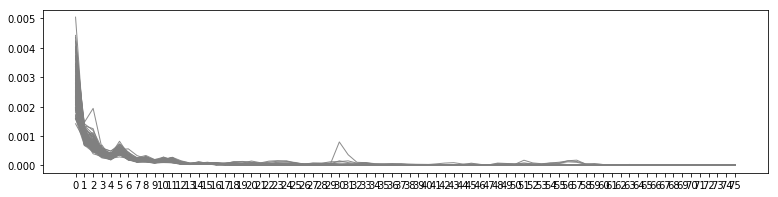

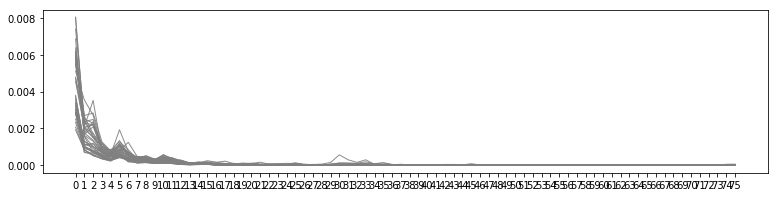

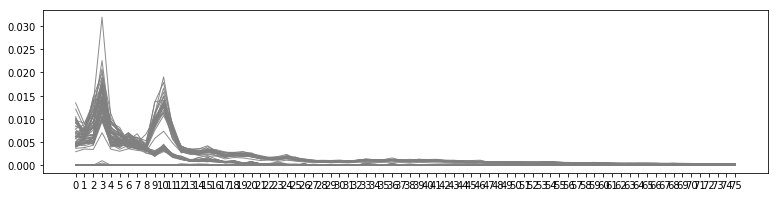

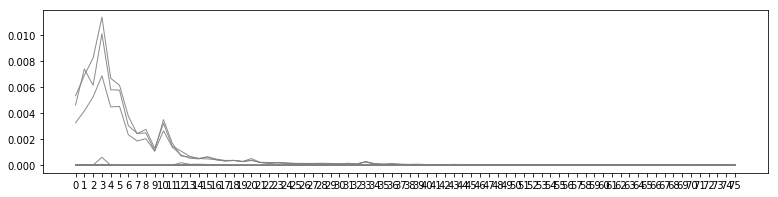

In [393]:
#EDA

from sklearn.preprocessing import scale
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=scale(OutputNormalTrans,axis=1)   #按行標準化

outputTotalTrans = pd.DataFrame(OutputNormalTrans)
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

    
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=scale(OutputErrTrans,axis=1)   #按行標準化

outputTotalTrans = pd.DataFrame(OutputErrTrans)
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

#-----------------------------換位置後資料--------------------------------------------------  

changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
#changedOutputNormalTrans=scale(changedOutputNormalTrans,axis=1)   #按行標準化

outputTotalTrans = pd.DataFrame(changedOutputNormalTrans)
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

    
    
changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
#changedOutputErrTrans=scale(changedOutputErrTrans,axis=1)   #按行標準化

outputTotalTrans = pd.DataFrame(changedOutputErrTrans)
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

    
#--------------------------------------------------------------------------------------------------

res = pd.concat([outputTotalTrans,OutputErrTrans],axis=0, ignore_index=True)

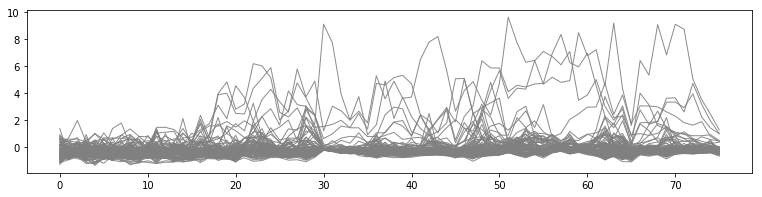

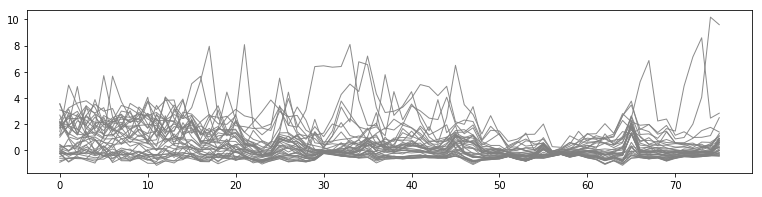

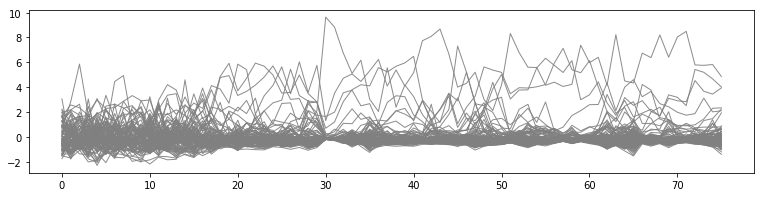

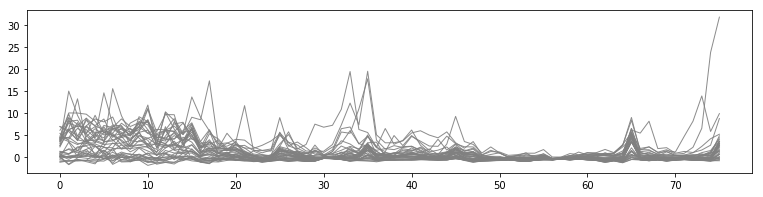

In [8]:
#--------用所有資料正規化----------------------------------------------------------
#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)


std_scaler = preprocessing.StandardScaler()
#只能用normal 因為之後只能用normal調整
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(OutputNormalTrans))
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw

outputTotalTrans = pd.DataFrame(std.transform(OutputErrTrans))
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

#--------用正常資料正規化----------------------------------------------------------- 
#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
std_scaler = preprocessing.StandardScaler()
#只能用normal 因為之後只能用normal調整
std = std_scaler.fit(OutputNormalTrans)
outputTotalTrans = pd.DataFrame(std.transform(OutputNormalTrans))
outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
outputTotalTrans = pd.DataFrame(std.transform(OutputErrTrans))
data = outputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    

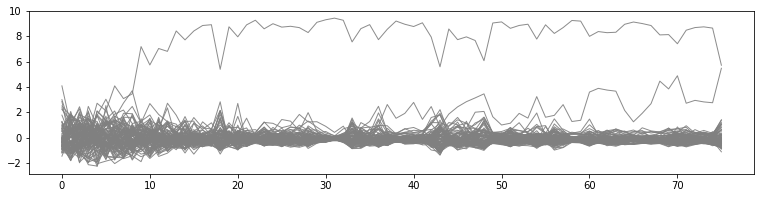

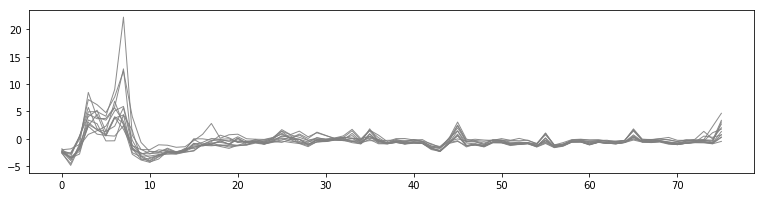

In [182]:
changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
#changedOutputNormalTrans=pd.DataFrame(scale(changedOutputNormalTrans,axis=1))
std_scaler = preprocessing.StandardScaler()
std = std_scaler.fit(changedOutputNormalTrans)
changedOutputTotalTrans = pd.DataFrame(std.transform(changedOutputNormalTrans))
data = changedOutputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)

    
    
#繪圖
#DrawExtractDataLine("Normal DataSet", OutputNormalTransNormal,None, None, False, "")   OutputNormalRaw
changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
#changedOutputErrTrans=pd.DataFrame(scale(changedOutputErrTrans,axis=1))
changedOutputTotalTrans = pd.DataFrame(std.transform(changedOutputErrTrans))
data = changedOutputTotalTrans.iloc[:,0:76]
startcCols = 0
endCols = len(data.columns)
plt.figure(figsize=(13, 3))
for i in range(len(data)):
    plt.plot(data.columns[0:endCols].values, data.iloc[i, startcCols:endCols].values, marker='', color="grey", linewidth=1, alpha=0.9)
    

# 建模_RF

In [394]:
#OutputNormalRaw=changedOutputNormalRaw
#OutputErrRaw=changedOutputErrRaw

#轉換資料格式
from sklearn.preprocessing import scale

OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))

#changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
#changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
#res = pd.concat([OutputNormalTrans,changedOutputNormalTrans,OutputErrTrans,changedOutputErrTrans],axis=0, ignore_index=True)
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)

#res=pd.DataFrame(scale(res,axis=1))
std_scaler = preprocessing.StandardScaler()
#只能用normal 因為之後只能用normal調整
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(res))

outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})


#outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)+ [0]* len(changedOutputNormalRaw)  +[1]* len(OutputErrRaw)+[1]* len(changedOutputErrRaw)
outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)+[1]* len(OutputErrRaw)

In [395]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [396]:
from sklearn import ensemble 
forest_param_grid = {'n_estimators': [10,15, 20,25, 30, 35, 40, 45],'max_depth':[1, 2, 3, 4]}


In [397]:
model = ensemble.RandomForestClassifier(oob_score = True) #random_state = 11, 
kf = KFold(n_splits=5,shuffle=True) #, random_state=40
forest_grid = GridSearchCV(estimator= model, param_grid = forest_param_grid,scoring='accuracy', cv=kf, verbose=1)

In [398]:
start_time = datetime.datetime.now()
forest_grid.fit(outputTotalTrans.iloc[:, 20:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
--- 0:00:05.006929 seconds ---


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    4.9s finished


In [399]:
print_best_score(forest_grid, forest_param_grid)

Best score: 0.949
Best parameters set:
	max_depth: 4
	n_estimators: 30


In [400]:
y_pred = forest_grid.predict(outputTotalTrans.iloc[:, 20:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.985


[0.72046346 0.60021645 0.76909091 0.67486631 0.84884615 0.82360825
 0.88718431 0.84452381 0.87417957]


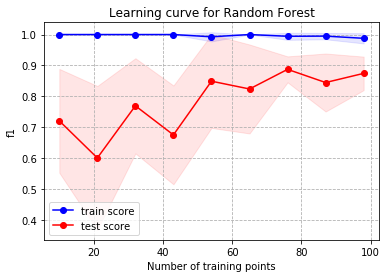

In [401]:
X_train = outputTotalTrans.iloc[:, 20:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=forest_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='f1', n_jobs=- 1)

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for Random Forest', 'Number of training points', 'f1')

In [372]:
importances = forest_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(x_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
indices

array([12, 13, 22, 46, 14, 38,  5,  1, 34,  6, 18, 36,  2,  9, 43, 20, 39,
       61, 24, 23, 44, 41, 56, 62, 16, 64,  7, 63, 55, 19, 37, 57, 31,  0,
       53, 28,  8, 58, 35, 54, 25, 50, 45, 49, 10, 11,  4,  3, 15, 65, 17,
       21, 26, 27, 29, 30, 33, 40, 42, 47, 48, 51, 52, 59, 60, 32],
      dtype=int64)

# 建模_SVC

In [402]:
from sklearn.preprocessing import scale
#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
#changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
#changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)

#res=pd.DataFrame(scale(res,axis=1))
std_scaler = preprocessing.StandardScaler()
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(res))

outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})

outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)  +[1]* len(OutputErrRaw)


In [403]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

from sklearn.svm import SVC
svc_param_grid = { 'C':  [1, 1.2, 1.4,1.6,1.8,2.0], 'gamma': [0.00001,0.00003,0.00005, 0.00007],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }

In [404]:
lsvc = SVC(probability=True)
kf = KFold(n_splits=5,shuffle=True) #, random_state=43
svc_grid = GridSearchCV(estimator= lsvc, param_grid = svc_param_grid,scoring='accuracy', cv=kf, verbose=1)

In [405]:
start_time = datetime.datetime.now()
svc_grid.fit(outputTotalTrans.iloc[:, 20:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
--- 0:00:02.236247 seconds ---


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.1s finished


In [406]:
print_best_score(svc_grid, svc_param_grid)

Best score: 0.971
Best parameters set:
	C: 1
	gamma: 1e-05
	kernel: 'linear'


In [407]:
y_pred = svc_grid.predict(outputTotalTrans.iloc[:, 20:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 1.000


[0.56166667 0.73644356 0.82913534 0.91368003 0.8990404  0.92126263
 0.93295853 0.93295853 0.89722222]


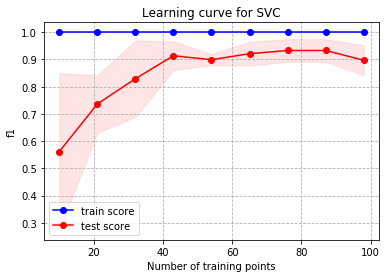

In [408]:
X_train = outputTotalTrans.iloc[:, 20:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=svc_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='f1')

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for SVC', 'Number of training points', 'f1')

# 建模_XgBoost

In [409]:
from sklearn.preprocessing import scale
#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
#changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
#changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)

#res=pd.DataFrame(scale(res,axis=1))
std_scaler = preprocessing.StandardScaler()
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(res))

outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})

outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)  +[1]* len(OutputErrRaw)

In [410]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [411]:
import xgboost as xgb
xgb_param_grid = {'n_estimators':[10,15, 20,25, 30]
                  ,'max_depth':[2,3,4],'gamma': [0.0001,0.0005, 0.001], 'subsample': [1]}
other_params = {}

In [412]:
xgb_inst= xgb.XGBClassifier(**other_params)
kf = KFold(n_splits=5,shuffle=True)
xgb_grid = GridSearchCV(estimator= xgb_inst, param_grid = xgb_param_grid,scoring='accuracy', cv=kf, verbose=1)

In [413]:
start_time = datetime.datetime.now()
xgb_grid.fit(outputTotalTrans.iloc[:, 20:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
--- 0:00:03.487214 seconds ---


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.4s finished


In [414]:
print_best_score(xgb_grid, xgb_param_grid)

Best score: 0.912
Best parameters set:
	gamma: 0.0001
	max_depth: 3
	n_estimators: 20
	subsample: 1


In [415]:
y_pred = xgb_grid.predict(outputTotalTrans.iloc[:, 20:76])
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.993


[0.09230769 0.37747086 0.62545788 0.66736264 0.55218615 0.70452991
 0.76064327 0.79146027 0.76449609]


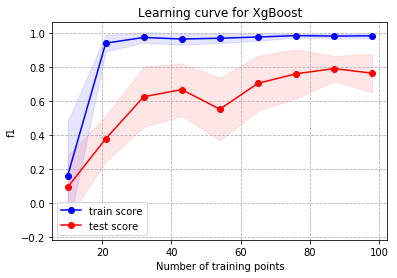

In [416]:
X_train = outputTotalTrans.iloc[:, 20:76]
y_train = outputTotalTrans["dataType"]

train_sizes, train_scores, test_scores = learning_curve(
        estimator=xgb_grid.best_estimator_, X=X_train, y=y_train,
        train_sizes=np.arange(0.1, 1.0, 0.1), cv=kf, scoring='f1')

plot_learning_curve(train_sizes, train_scores, test_scores, 'Learning curve for XgBoost', 'Number of training points', 'f1')

## 羅吉斯回歸

In [464]:
from sklearn.preprocessing import scale
#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
#changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
#changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)

#res=pd.DataFrame(scale(res,axis=1))
std_scaler = preprocessing.StandardScaler()
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(res))

outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})

outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)  +[1]* len(OutputErrRaw)

In [429]:
#資料shuffle
outputTotalTrans = outputTotalTrans.sample(frac=1)

In [436]:
from sklearn.linear_model import LogisticRegression
start_time = datetime.datetime.now()
log_reg=LogisticRegression(C=1e15)
log_reg.fit(outputTotalTrans.iloc[:, 20:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

--- 0:00:00.004971 seconds ---


In [437]:
y_pred=log_reg.predict(outputTotalTrans.iloc[:, 20:76])

In [438]:
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 1.000


## 貝式分類

In [470]:
from sklearn.preprocessing import scale
#轉換資料格式
OutputNormalTrans = utils.transRawData(OutputNormalRaw)
#OutputNormalTrans=pd.DataFrame(scale(OutputNormalTrans,axis=1))
#changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
OutputErrTrans = utils.transRawData(OutputErrRaw)
#OutputErrTrans=pd.DataFrame(scale(OutputErrTrans,axis=1))
#changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
res = pd.concat([OutputNormalTrans,OutputErrTrans],axis=0, ignore_index=True)

#res=pd.DataFrame(scale(res,axis=1))
std_scaler = preprocessing.StandardScaler()
std = std_scaler.fit(res)
outputTotalTrans = pd.DataFrame(std.transform(res))

outputTotalTrans =outputTotalTrans.rename(columns={76: "dataType"})

outputTotalTrans["dataType"] = [0]* len(OutputNormalRaw)  +[1]* len(OutputErrRaw)

In [471]:
from sklearn.naive_bayes import GaussianNB
start_time = datetime.datetime.now()
gnb = GaussianNB()
gnb.fit(outputTotalTrans.iloc[:, 20:76],outputTotalTrans["dataType"])
end_time=datetime.datetime.now()
print("--- %s seconds ---" % (end_time - start_time))

--- 0:00:00.000998 seconds ---


In [472]:
y_pred=gnb.predict(outputTotalTrans.iloc[:, 20:76])

In [473]:
print("accuracy = %.*f" % (3,metrics.accuracy_score(outputTotalTrans["dataType"], y_pred)))

accuracy = 0.891


## Predict Normal

In [475]:
changedOutputNormalTrans = utils.transRawData(changedOutputNormalRaw)
#changedOutputNormalTrans=pd.DataFrame(scale(changedOutputNormalTrans,axis=1))

#std_scaler = preprocessing.StandardScaler()
#std = std_scaler.fit(changedOutputNormalTrans)
changedOutputTotalTrans = pd.DataFrame(std.transform(changedOutputNormalTrans))


svc_y_pred = svc_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:, 20:76])
forest_y_pred = forest_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:,20:76])
xgb_y_pred = xgb_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:,20:76])
log_reg_y_pred=log_reg.predict(changedOutputTotalTrans.iloc[:, 20:76])
gnb_y_pred=gnb.predict(changedOutputTotalTrans.iloc[:, 20:76])

In [476]:
changedOutputTotalTrans["dataType"] = 0

In [477]:
print("正常資料預測")
print("svc_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], svc_y_pred)))
print("forest_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], forest_y_pred)))
print("xgb_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], xgb_y_pred)))
print("log_reg_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], log_reg_y_pred)))
print("gnb_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], gnb_y_pred)))

正常資料預測
svc_accuracy = 0.881
forest_accuracy = 0.663
xgb_accuracy = 0.663
log_reg_accuracy = 1.000
gnb_accuracy = 0.446


## Predict Error

In [478]:
changedOutputErrTrans = utils.transRawData(changedOutputErrRaw)
#changedOutputErrTrans=pd.DataFrame(scale(changedOutputErrTrans,axis=1))

#std_scaler = preprocessing.StandardScaler()
#std = std_scaler.fit(changedOutputErrTrans)
#changedOutputTotalTrans=pd.DataFrame(scale(changedOutputTotalTrans,axis=1))
changedOutputTotalTrans = pd.DataFrame(std.transform(changedOutputErrTrans))


svc_y_pred = svc_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:, 20:76])
forest_y_pred = forest_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:, 20:76])
xgb_y_pred = xgb_grid.best_estimator_.predict(changedOutputTotalTrans.iloc[:,20:76])
log_reg_y_pred=log_reg.predict(changedOutputTotalTrans.iloc[:, 20:76])
gnb_y_pred=gnb.predict(changedOutputTotalTrans.iloc[:, 20:76])

In [479]:
changedOutputTotalTrans["dataType"] = 1
print("異常資料預測")
print("svc_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], svc_y_pred)))
print("forest_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], forest_y_pred)))
print("xgb_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], xgb_y_pred)))
print("log_reg_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], log_reg_y_pred)))
print("gnb_accuracy = %.*f" % (3,metrics.accuracy_score(changedOutputTotalTrans["dataType"], gnb_y_pred)))

異常資料預測
svc_accuracy = 0.000
forest_accuracy = 0.870
xgb_accuracy = 0.870
log_reg_accuracy = 0.000
gnb_accuracy = 0.130


## EDA


In [234]:
corrTrans = outputTotalTrans.corr()
corrTrans[abs(corrTrans["dataType"])>0.3]["dataType"]

0           0.588028
1           0.595024
2           0.597999
3           0.658638
4           0.619010
5           0.618087
6           0.621909
7           0.651188
8           0.601305
9           0.675058
10          0.600366
11          0.502879
12          0.606189
13          0.609019
14          0.614518
15          0.632639
16          0.353516
17          0.409876
18          0.340568
19          0.378321
20          0.409763
25          0.457828
26          0.342489
32          0.320284
33          0.328228
34          0.306191
35          0.459691
40          0.357905
45          0.463875
65          0.699767
75          0.447596
dataType    1.000000
Name: dataType, dtype: float64